In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

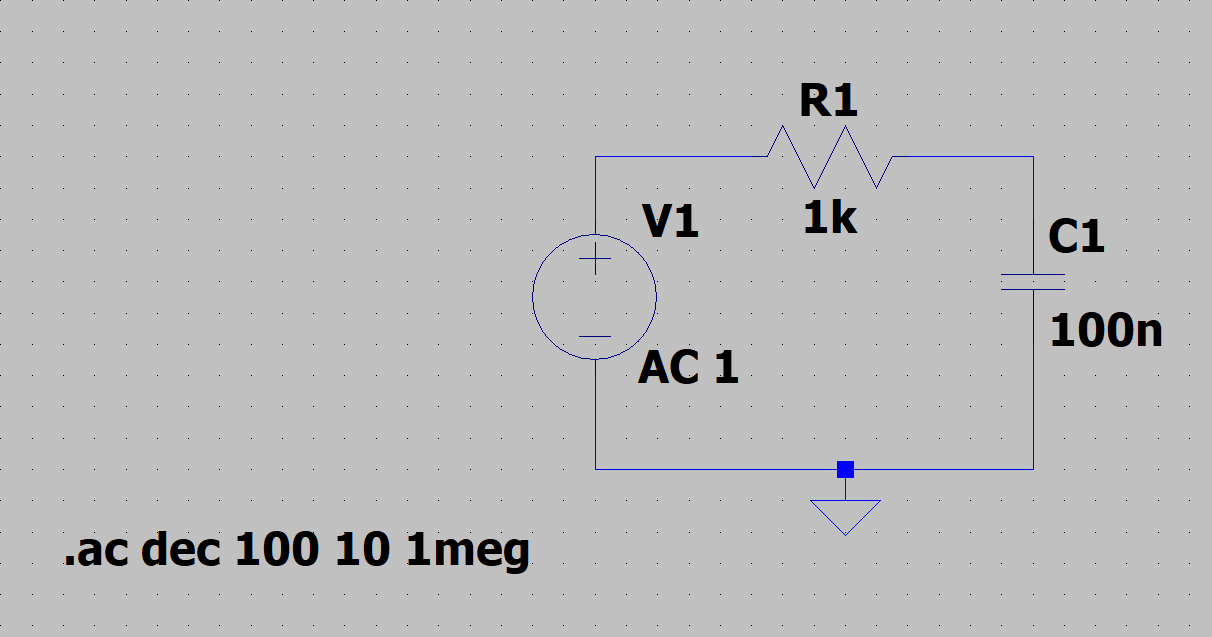

In [7]:
easy = cv.imread("images/easy.png", 1)
Image("images/easy.png")

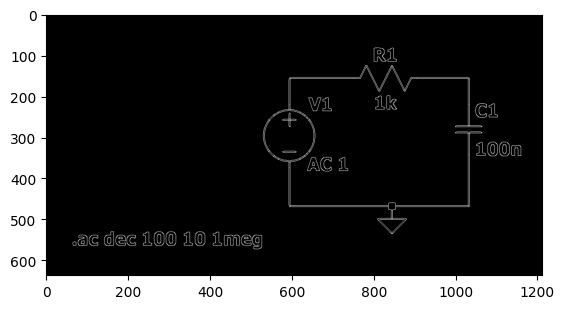

In [37]:
blur = cv.blur(easy, (3,3))
edge = cv.Canny(blur, 100, 200)

plt.imshow(edge, cmap='gray')
plt.show()


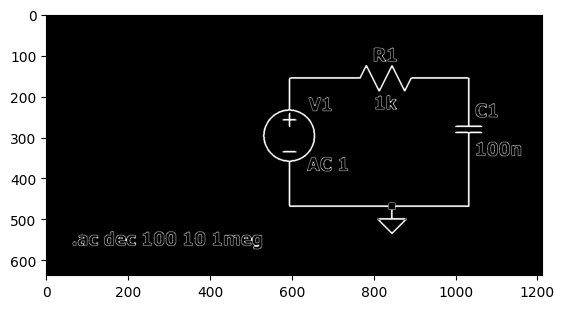

In [41]:
kernel = np.ones((3, 3), np.uint8) 
edges = cv.dilate(edge, kernel, iterations=1) 
kernel = np.ones((3, 3), np.uint8) 
edges = cv.erode(edges, kernel, iterations=1) 

plt.imshow(edges, cmap='gray')
plt.show()

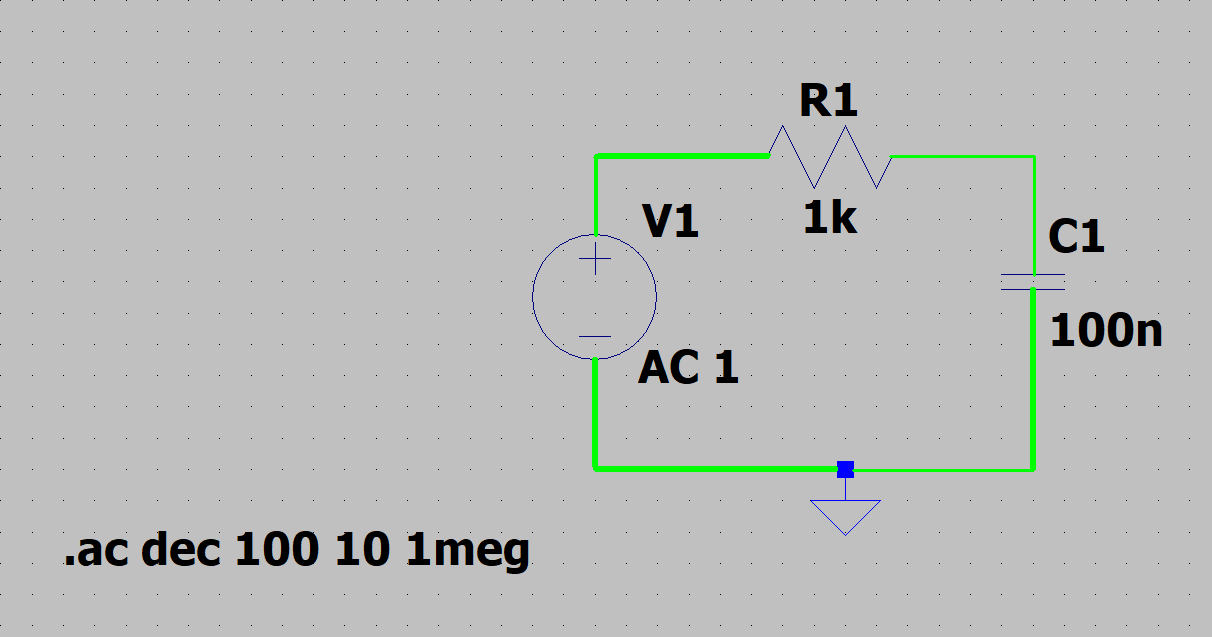

In [46]:
lines_image = easy.copy()

# Apply HoughLinesP method to 
# to directly obtain line end points
lines_list =[]
lines = cv.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/2, # Angle resolution in radians
            threshold=80, # Min number of votes for valid line
            minLineLength=50, # Min allowed length of line
            maxLineGap=2 # Max allowed gap between line for joining them
            )

# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv.line(lines_image,(x1,y1),(x2,y2),(0,255,0),2)
    # Maintain a simples lookup list for points
    lines_list.append([(x1,y1),(x2,y2)])

# All the changes made in the input image are finally
# written on a new image houghlines.jpg
cv.imwrite("attempts/easy-linesDetected.png", lines_image)

Image("attempts/easy-linesDetected.png")

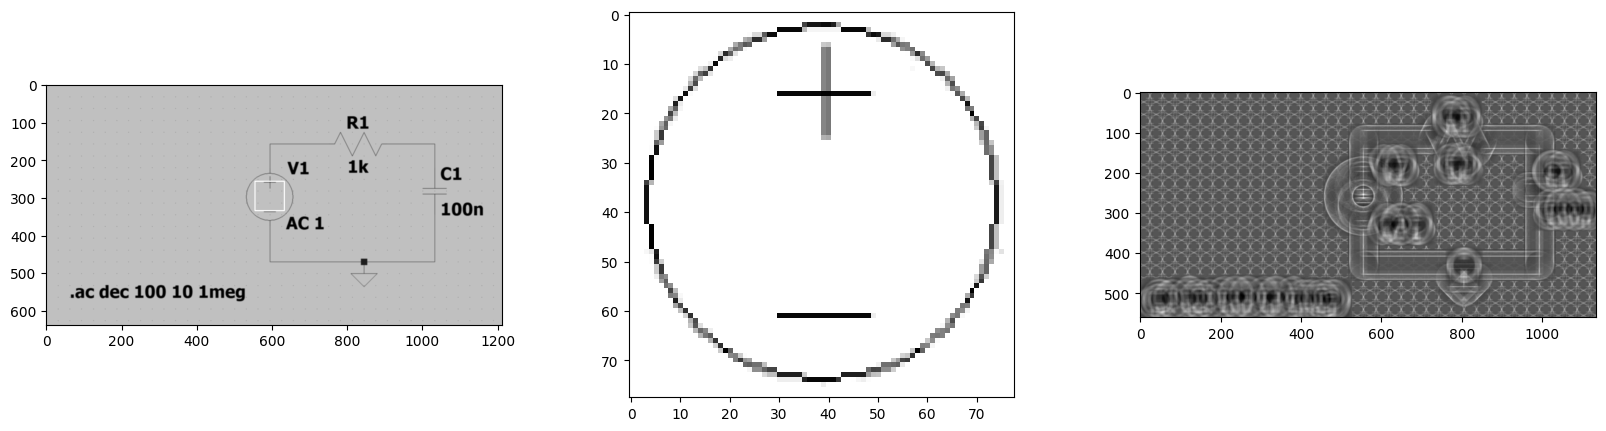

In [52]:
template = cv.imread("templates/powersupply.png", 0) 
easy_gray = cv.cvtColor(easy, cv.COLOR_BGR2GRAY)
easy_gray = cv.blur(easy_gray, (3,3))

w, h = template.shape[::-1]
res = cv.matchTemplate(easy_gray, template, cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv.rectangle(easy_gray,top_left, bottom_right, 255, 2)

plt.figure(figsize=[20,5])
plt.subplot(131),plt.imshow(easy_gray,cmap='gray')
plt.subplot(132),plt.imshow(template, cmap='gray')
plt.subplot(133),plt.imshow(res, cmap='gray')
plt.show()